In [1]:
# !pip install mlflow

In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_excel(r"D:\Quality Thought\Internship\Data Sets\Global Superstore.xls")

In [4]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [5]:
df.shape

(51290, 24)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [7]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [8]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [9]:
# values outside interquartile range(25% to 75%) is called outlier

In [10]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [11]:
# Outlier Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x1e07ba1bcb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e07ba742f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e07ba1bb90>],
 'medians': [<matplotlib.lines.Line2D at 0x1e07ba74920>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e07ba74c20>],
 'means': []}

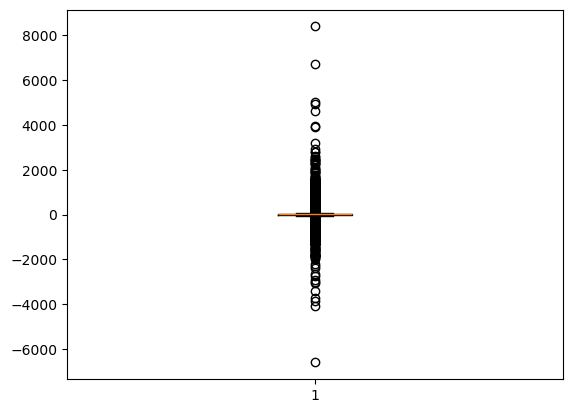

In [12]:
plt.boxplot(df["Profit"])

In [13]:
df["Profit"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     -30.5712
0.25       0.0000
0.50       9.2400
0.75      36.8100
1.00    8399.9760
Name: Profit, dtype: float64

In [14]:
df.shape

(51290, 24)

In [15]:
df_1=df[(df["Profit"] >=0.0) & (df["Profit"] <=36.8100)]

In [16]:
df_1.shape

(25928, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e000094200>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0000947d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e00003bef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e000094dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e000095100>],
 'means': []}

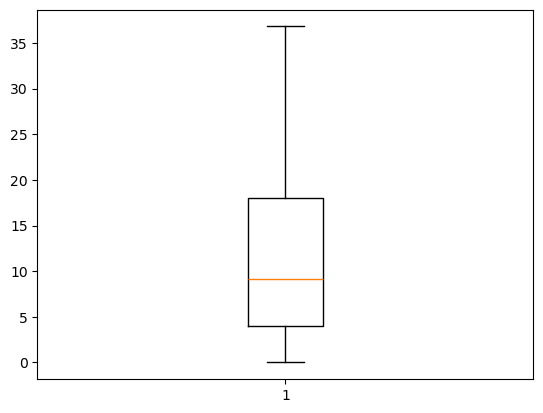

In [17]:
plt.boxplot(df_1["Profit"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0000f8a70>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0000f8f80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e00000e2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0000f9550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0000f9850>],
 'means': []}

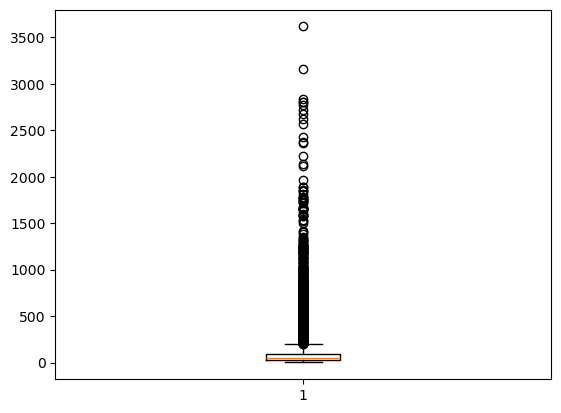

In [18]:
plt.boxplot(df_1["Sales"])

In [19]:
df_1["Sales"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10      12.54
0.25      23.64
0.50      48.78
0.75      96.18
1.00    3616.50
Name: Sales, dtype: float64

In [20]:
df_2=df_1[(df_1["Sales"] >=23.64) & (df_1["Sales"] <=96.18)]

In [21]:
df_2.shape

(12977, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e000474680>,
 'caps': [<matplotlib.lines.Line2D at 0x1e000474bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e000426ae0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0004751c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e000475460>],
 'means': []}

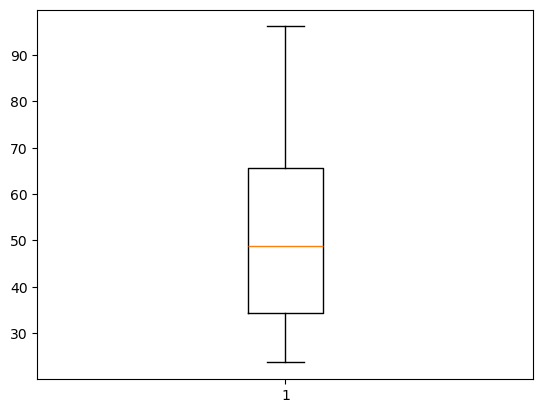

In [22]:
plt.boxplot(df_2["Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0004afb00>,
 'caps': [<matplotlib.lines.Line2D at 0x1e00043c080>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0004af830>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0004ec530>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0004ec800>],
 'means': []}

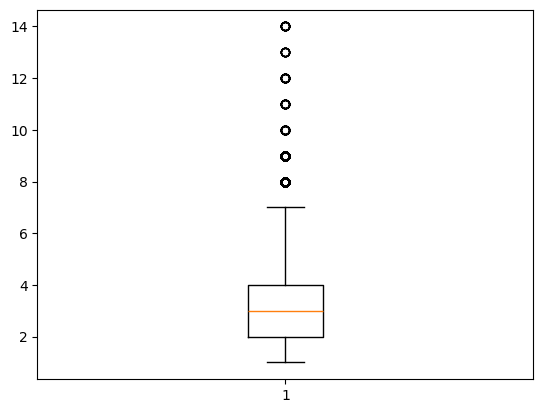

In [23]:
plt.boxplot(df_2["Quantity"])

In [24]:
df_2["Quantity"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     1.0
0.25     2.0
0.50     3.0
0.75     4.0
1.00    14.0
Name: Quantity, dtype: float64

In [25]:
df_3=df_2[(df_2["Quantity"] >=2.0) & (df_2["Quantity"] <=4.0)]

In [26]:
df_3.shape

(7906, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0017ce570>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0017ceb40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0017ce360>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0017cf110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0017cf3b0>],
 'means': []}

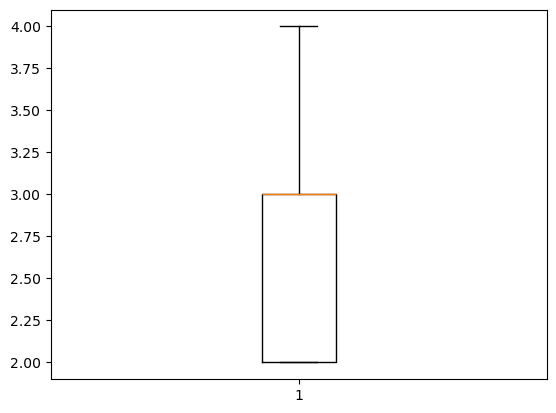

In [27]:
plt.boxplot(df_3["Quantity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e00183aa50>,
 'caps': [<matplotlib.lines.Line2D at 0x1e00183b080>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e00183a750>],
 'medians': [<matplotlib.lines.Line2D at 0x1e00183b5f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e00183b8c0>],
 'means': []}

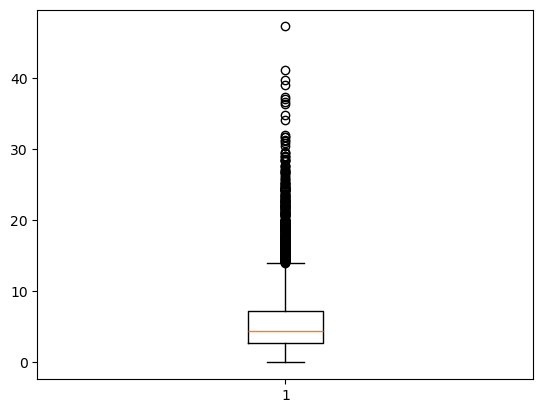

In [28]:
plt.boxplot(df_3["Shipping Cost"])

In [29]:
df_3["Shipping Cost"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     1.72000
0.25     2.70000
0.50     4.46100
0.75     7.23675
1.00    47.28000
Name: Shipping Cost, dtype: float64

In [30]:
df_4=df_3[(df_3["Shipping Cost"] >=2.70) & (df_3["Shipping Cost"] <=7.23675)]

In [31]:
df_4.shape

(3953, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0006a8b90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0006a9190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0006a88f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0006a9700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0006a9940>],
 'means': []}

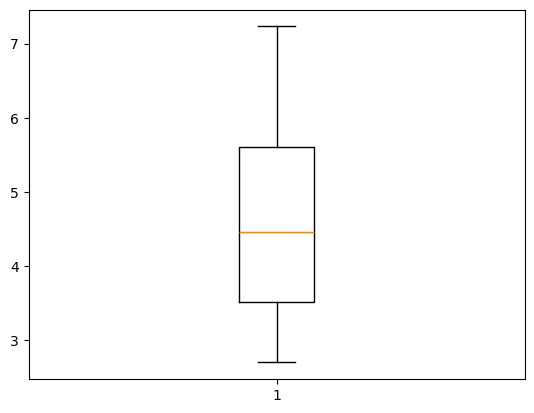

In [32]:
plt.boxplot(df_4["Shipping Cost"])

In [33]:
df_4.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
26583,10778,ES-2014-5617990,2014-09-11,2014-09-12,First Class,LW-16825,Laurel Workman,Corporate,Schiltigheim,Alsace,...,OFF-SU-10003160,Office Supplies,Supplies,"Acme Ruler, High Speed",33.420,2,0.0,1.320,7.23,High
26584,17129,ES-2014-3096832,2014-07-04,2014-07-09,Standard Class,BW-11065,Barry Weirich,Consumer,Catania,Sicily,...,OFF-AR-10002145,Office Supplies,Art,"Binney & Smith Sketch Pad, Fluorescent",95.160,2,0.0,4.740,7.23,Medium
26586,21231,IN-2012-45951,2012-11-02,2012-11-06,Standard Class,JG-15115,Jack Garza,Consumer,Bhopal,Madhya Pradesh,...,OFF-EN-10000315,Office Supplies,Envelopes,"Jiffy Business Envelopes, Security-Tint",47.880,3,0.0,9.090,7.23,High
26587,23945,IN-2012-40547,2012-11-29,2012-11-30,First Class,GT-14710,Greg Tran,Consumer,Adelaide,South Australia,...,OFF-BI-10004685,Office Supplies,Binders,"Acco Binder, Economy",40.905,3,0.1,9.495,7.23,High
26594,31408,CA-2013-128867,2013-11-04,2013-11-11,Standard Class,CL-12565,Clay Ludtke,Consumer,Urbandale,Iowa,...,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",75.960,2,0.0,22.788,7.23,Medium


In [34]:
# 1. boxplot => to identify outlier
# 2. outlier => simple and effective IQR technique

In [35]:
# Missing value imputations

In [36]:
df_4.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Postal Code       3268
Market               0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
Order Priority       0
dtype: int64

In [37]:
df_4.drop(["Postal Code"],axis=1,inplace=True)

C:\Users\Shri\AppData\Local\Temp\ipykernel_15132\3596599742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4.drop(["Postal Code"],axis=1,inplace=True)


In [38]:
df_4.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [39]:
df4_num=df_4.select_dtypes(include=[np.number])

In [40]:
df4_cat=df_4.select_dtypes(include=["object"])

In [41]:
df4_num.columns

Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [42]:
df4_cat.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')

In [43]:
# encoding, scaling

In [44]:
df4_num.drop(['Row ID'],axis=1,inplace=True)

In [45]:
from sklearn import preprocessing

In [46]:
le=preprocessing.LabelEncoder()

In [47]:
mm_scaler = preprocessing.MinMaxScaler()

In [48]:
df4_cat_e =df4_cat.apply(le.fit_transform)

In [49]:
df4_num.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [50]:
df4_num_mm =mm_scaler.fit_transform(df4_num)

In [51]:
df4_num_mm_sc=pd.DataFrame(df4_num_mm)


In [52]:
df4_num_mm_sc.head()

,0,1,2,3,4
0,0.134822,0.0,0.0,0.035948,1.0
1,0.985939,0.0,0.0,0.129085,1.0
2,0.334160,0.5,0.0,0.247549,1.0
3,0.238007,0.5,0.2,0.258578,1.0
4,0.721257,0.0,0.0,0.620588,1.0


In [53]:
df4_cat_e.head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
26583,1476,0,706,447,1,1229,19,35,4,3,2160,1,14,79,1
26584,1359,3,183,70,0,282,497,51,4,10,462,1,2,271,3
26586,1773,3,544,337,0,176,319,46,0,4,923,1,6,739,1
26587,1758,0,468,310,0,10,506,4,0,9,826,1,3,27,1
26594,353,3,232,169,0,1390,246,105,6,3,352,1,2,697,3


In [54]:
d1=df4_cat_e.reset_index()

In [55]:
d1.head()

,index,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,26583,1476,0,706,447,1,1229,19,35,4,3,2160,1,14,79,1
1,26584,1359,3,183,70,0,282,497,51,4,10,462,1,2,271,3
2,26586,1773,3,544,337,0,176,319,46,0,4,923,1,6,739,1
3,26587,1758,0,468,310,0,10,506,4,0,9,826,1,3,27,1
4,26594,353,3,232,169,0,1390,246,105,6,3,352,1,2,697,3


In [56]:
d1.drop(["index"],axis=1,inplace=True)

In [57]:
df_final=pd.concat([df4_num_mm_sc,d1],axis=1)

In [58]:
df_final.rename(columns={0:"Sales",1:"Quantity",2:"Discount",3:"Profit",4:"Shipping Cost"},inplace=True)

In [59]:
df_final.head()

,Sales,Quantity,Discount,Profit,Shipping Cost,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,0.134822,0.0,0.0,0.035948,1.0,1476,0,706,447,1,1229,19,35,4,3,2160,1,14,79,1
1,0.985939,0.0,0.0,0.129085,1.0,1359,3,183,70,0,282,497,51,4,10,462,1,2,271,3
2,0.334160,0.5,0.0,0.247549,1.0,1773,3,544,337,0,176,319,46,0,4,923,1,6,739,1
3,0.238007,0.5,0.2,0.258578,1.0,1758,0,468,310,0,10,506,4,0,9,826,1,3,27,1
4,0.721257,0.0,0.0,0.620588,1.0,353,3,232,169,0,1390,246,105,6,3,352,1,2,697,3


In [60]:
df_final.isnull().sum()

Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Order Priority    0
dtype: int64

In [61]:
Y=df_final["Sales"]

In [62]:
X=df_final.drop(["Sales"],axis=1)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [65]:
# MLFLows

In [66]:
import sys


In [67]:
sys.path

['C:\\Users\\Shri',
 'C:\\Users\\Shri\\anaconda3\\python312.zip',
 'C:\\Users\\Shri\\anaconda3\\DLLs',
 'C:\\Users\\Shri\\anaconda3\\Lib',
 'C:\\Users\\Shri\\anaconda3',
 '',
 'C:\\Users\\Shri\\anaconda3\\Lib\\site-packages',
 'C:\\Users\\Shri\\anaconda3\\Lib\\site-packages\\win32',
 'C:\\Users\\Shri\\anaconda3\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\Shri\\anaconda3\\Lib\\site-packages\\Pythonwin']

In [68]:
import os

os.environ['GIT_PYTHON_REFRESH'] = 'quiet'
os.environ['MLFLOW_TRACKING_URI'] = 'file:///Users/Shri/MLFlows'


In [69]:
import mlflow

In [70]:
mlflow.set_experiment("globalstore-analysis")
mlflow.set_experiment_tag('store-tag','ex1')

In [71]:
with mlflow.start_run():    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score
    
    # model object initialization
    RandFor=RandomForestRegressor(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingRegressor(n_estimators=3000,max_depth=6,learning_rate=0.01,min_samples_split=5)
    rf_n_estimators=5000
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(X_train,y_train)
    gbm=GBM.fit(X_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(X_train,y_train)
    training_score_gbm=GBM.score(X_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(X_test)
    y_pred_gbm=gbm.predict(X_test)
    
    #prediction evaluations
    testing_score_rf=r2_score(y_pred_rf,y_test)
    testing_score_gbm=r2_score(y_pred_gbm,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_training_score", testing_score_rf)
    mlflow.log_metric("gbm_training_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")

    

2025/05/22 09:50:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/22 09:50:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [144]:
import requests
import json

data = {'dataframe_records': X_test.values.tolist()}
headers = {"Content-Type": "application/json"}

response = requests.post("http://localhost:8003/invocations", data=json.dumps(data), headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [0.8192777932351215, 0.4714533441002799, 0.5342414303587928, 0.5489861062254706, 0.6576701382768798, 0.4680012215755022, 0.14404684650963104, 0.2591646128138256, 0.40359436192379056, 0.3634773448303341, 0.1992524518621871, 0.33545982408809555, 0.7131866947504788, 0.20030475507276932, 0.6566480116699198, 0.1367737720243103, 0.27669443990832115, 0.2664851869127495, 0.4929462430383486, 0.17282329541733485, 0.28356736911279073, 0.7054068758772111, 0.2145425651164209, 0.48993626240694277, 0.406370757263381, 0.5992403591966547, 0.17258059686000526, 0.15329419049130807, 0.1400609065419344, 0.15148542581268173, 0.5037705216629151, 0.4150770050471548, 0.14435679790264297, 0.27164263379792214, 0.16508861312326203, 0.6814980876522125, 0.2708570116389405, 0.6993951199542628, 0.40507239353709956, 0.35290387481904356, 0.3759671482257634, 0.6223116558408518, 0.13853533612415606, 0.30651173460872244, 0.47732314273189125, 0.16472245456798354, 0.3602750943160599, 0.2094804726659234, 0.28

In [146]:
import requests
import json

data = {'dataframe_records': X_test.values.tolist()}
headers = {"Content-Type": "application/json"}

response = requests.post("http://localhost:8004/invocations", data=json.dumps(data), headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [0.7705540198926089, 0.37462207138442305, 0.4921878265214799, 0.604500514803149, 0.705881459405687, 0.5508621848671245, 0.11741302818996142, 0.20920856203068738, 0.32175523835703546, 0.2850466298285975, 0.3074924831044555, 0.325565928815485, 0.6881860239163005, 0.2096755607398636, 0.6916816057379933, -0.000775903375678141, 0.3790637203808388, 0.34715313327034947, 0.4976239904632732, 0.18099887013548366, 0.2779182616755589, 0.6998948824544544, 0.14564156031051362, 0.5905807212232268, 0.43511460045566386, 0.561205671068344, 0.3044810228417805, 0.11927100439571231, 0.12135673596507601, 0.07253387502092551, 0.5994795110345938, 0.4005102082070465, 0.13122613446095888, 0.2429738549742947, 0.12411487626635297, 0.711293624326541, 0.2988515091474599, 0.6736739495804415, 0.4686230094102715, 0.34427892207646754, 0.32557129606299573, 0.6308253006999281, 0.09369064824214023, 0.3488627034014346, 0.4916176843625486, 0.15046454925949068, 0.3810816628667369, 0.13150106178607973, 0.33566